# Reasonable Recommendations - A joke recommender system

A short description of our project.

#### Summary

1. Dataset
2. Prototype Recommender System

#### 1. Dataset

A short description of our data set and where we got it from.

In [13]:
from IPython.core.display_functions import display
import pandas as pd
import seaborn as sns
ratings_df = pd.read_csv("jester_ratings.csv")
display(ratings_df)

,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875
...,...,...,...
1761434,63978,57,-8.531
1761435,63978,24,-9.062
1761436,63978,124,-9.031
1761437,63978,58,-8.656


In [14]:
jokes_df = pd.read_csv("jester_items.csv")
display(jokes_df)

,jokeId,jokeText
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,4,Q. What's the difference between a man and a t...
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...
...,...,...
145,146,America: 8:00 - Welcome to work! 12:00 - Lunch...
146,147,It was the day of the big sale. Rumors of the ...
147,148,"Recently a teacher, a garbage collector, and a..."
148,149,"A little girl asked her father, ""Daddy? Do all..."


Next we plot the number of jokes rated (y-axis) by each user (x-axis).

,ratings_count
userId,
1,62
2,34
3,18
4,3
5,82
...,...
63974,10
63975,8
63976,3


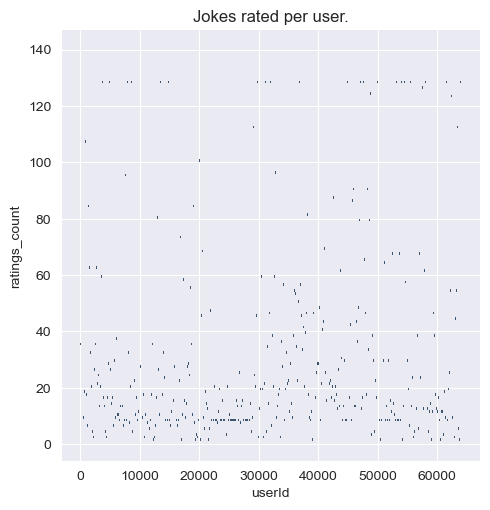

In [15]:
count_ratings_df = ratings_df[['userId', 'jokeId']].groupby(['userId']).count()
count_ratings_df.columns = ['ratings_count']
display(count_ratings_df)
fig = sns.displot(data=count_ratings_df, x='userId', y='ratings_count', binwidth=1)
fig.set(title='Jokes rated per user.')

,ratings_count
jokeId,
5,661
7,59122
8,57720
13,56333
15,54932
...,...
146,4913
147,9728
148,14988


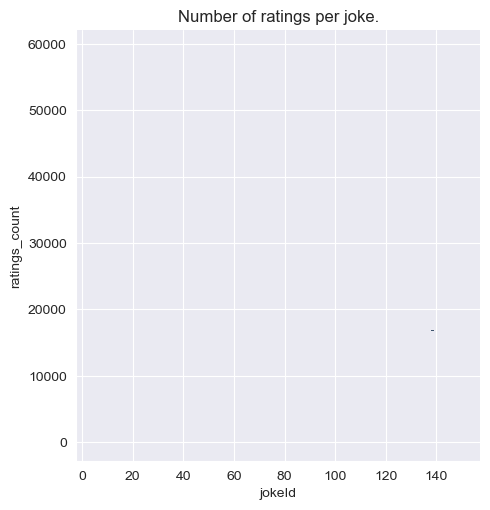

In [16]:
count_ratings_df = ratings_df[['userId', 'jokeId']].groupby(['jokeId']).count()
count_ratings_df.columns = ['ratings_count']
display(count_ratings_df)
fig = sns.displot(data=count_ratings_df, x='jokeId', y='ratings_count', binwidth=1)
fig.set(title='Number of ratings per joke.')
# Note: For some reason, the plot only show one point when I run the code. The table seem correct, though. - Dennis

,userId
jokeId,
5,661
7,59122
8,57720
13,56333
15,54932
...,...
146,4913
147,9728
148,14988


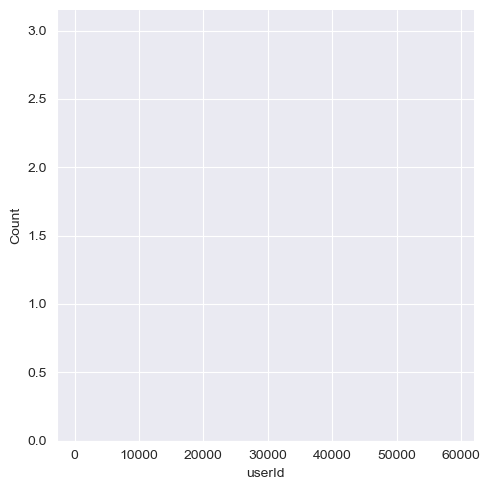

In [17]:
count_ratings_df = ratings_df[['userId', 'jokeId']].groupby(['jokeId']).count()
display(count_ratings_df)
sns.displot(data=count_ratings_df, x='userId', binwidth=1)
# NOTE: I don't understand how this is different from the previous cell. - Dennis

It looks like one user rated around a million jokes?

,index,jokeId,userId
0,0,7,59122
1,1,8,57720
2,2,13,56333
3,3,15,54932
4,4,16,54150
...,...,...,...
135,135,73,167
136,136,80,167
137,137,116,166
138,138,43,166


<AxesSubplot:xlabel='index', ylabel='userId'>

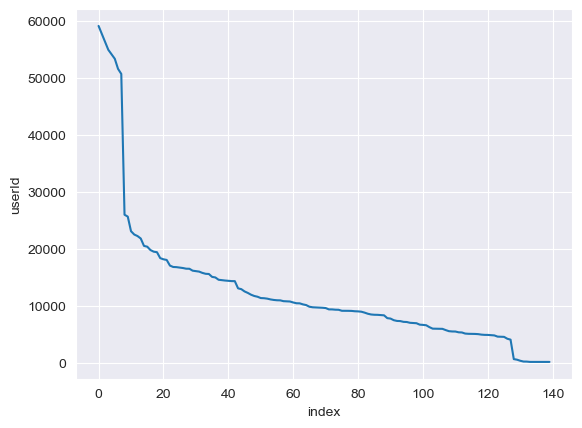

In [18]:
count_ratings_df_ord = count_ratings_df.sort_values(by="userId", ascending=False).reset_index().reset_index()
display(count_ratings_df_ord)
sns.lineplot(data=count_ratings_df_ord, x='index', y='userId')
# NOTE: It is not clear (to me) what 'index' represents in this case.

#### 2. Prototype Recommender System

Just like in the lab, let's select a user randomly and recommend something to them.

In [23]:
subset = ratings_df['rating'] > 7
users = ratings_df.loc[subset]
sample = users.sample()
column = sample.reset_index()['userId']
user = column.iloc[0]
print(f'Selected user: {user}')

Selected user: 14252


In [26]:
# This is a quick implementation of an item-item collaborative filtering recommender system. In the future, we plan to extend the feature vector with encodings about the contents of each joke. - Dennis
# NOTE: I would advocate for implementing an item-itme CF RS from scratch in PyTorch, allowing us for more flexibility. This goes in hand with our plan to concatenate more features.
from lenskit.algorithms import Recommender
from lenskit.algorithms.item_knn import ItemItem

_ratings = ratings_df.rename(columns={'userId':'user', 'jokeId':'item'})
_jokes = jokes_df.rename(columns={'jokeId':'item'})

item_item = ItemItem(20, min_nbrs=5, feedback='explicit')
recsys = Recommender.adapt(item_item)
recsys.fit(_ratings)

recommendations = recsys.recommend(user, 3)
recommended_jokes = recommendations.join(_jokes['jokeText'], on='item')
display(recommended_jokes)

,item,score,jokeText
0,35,6.725606,"A guy walks into a bar, orders a beer and says..."
1,53,6.639549,"The Pope dies and, naturally, goes to heaven. ..."
2,129,6.622446,An old man goes to the doctor for his yearly p...
